# Переводчик языка жестов

   ## Установка и импорт зависимостей

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

   ## Обозначение ключевых точек на изображении при помощи MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Установка и использование модели оценки MP Holistic
mp_drawing = mp.solutions.drawing_utils # Модули для отрисовки ключевых точек на изображении

   Для чтение изображений и получения прогнозов необходимо преобразовать порядок цветов из BGR в RGB. После чего следует преобразовать обратно в BGR и отобразить результат на изображении.

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Преобразуем порядок цветов из BGR в RGB
    image.flags.writeable = False                  # Изображение не читаемо
    results = model.process(image)                 # Прогноз
    image.flags.writeable = True                   # Изображение снова читаемо 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Преобразуем порядок цветов из RGB в BGR
    return image, results

Обозначим интересющие нас ключевые точки и их соединения. Для наглядности изменим стандартные значения цвета, толщины соединений и радиусов окружностей для интересующих нас ориентиров (лицо, поза, левая и правая рука). 

In [4]:
def draw_landmarks(image, results):
    # ориентиры лица
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # ориентиры позы
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # ориентиры левой руки
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # ориентиры правой руки  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    Получим  проверим доступ к камере, а затем установим модель восприятия medipipe. 
    
    Установим конфигурации модели: 

   min_detection_confidence - минимальное значение достоверности ( [0.0, 1.0]) из модели обнаружения человека для того, чтобы обнаружение считалось успешным. По умолчанию 0.5.
    
   min_tracking_confidence - минимальное значение достоверности ( [0.0, 1.0]) из модели отслеживания ориентиров, чтобы ориентиры позы считались отслеженными успешно, в противном случае обнаружение человека будет активировано автоматически на следующем входном изображении.

In [5]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # установка модели
    while cap.isOpened():

        ret, frame = cap.read() # Чтение кадров с веб-камеры

        image, results = mediapipe_detection(frame, holistic) # Распознавание 
        print(results)
        
        draw_landmarks(image, results) # Обозначим ориентиры

        cv2.imshow('Sign_Translator', image) # Выведем на экран

        if cv2.waitKey(10) & 0xFF == ord('q'): # закрываем окно
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Просмотрим количество ориентиров.

In [6]:
len(results.face_landmarks.landmark)

468

In [7]:
len(results.pose_landmarks.landmark)

33

Если рука не попала в камеру - Вы столкнетесь с ошибкой:"AttributeError: 'NoneType' object has no attribute 'landmark'".

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

Визуализируем полученные ориентиры при помощи plt.imshow().

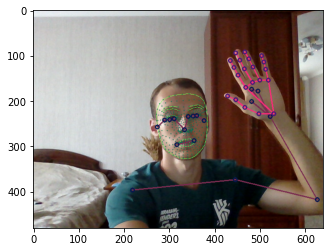

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Извлечем значения ключевых точек

Передадим массив в функцию и заменим нулями отсутствующие значения ориентиров. Для этого запишем значения np.zeros() для каждого ориентира (произведение количества ключевых точек на количество переменных).

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lefthand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
righthand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

Запишем значения всех ориентиров в одним массив с помощью np.concatenate().

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lefthand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    righthand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lefthand, righthand])

Просмотрим полученные результаты.

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.52254903,  0.54905719, -0.66053766, ...,  0.        ,
        0.        ,  0.        ])

## Создадим папки для записи массивов со значениями ключевых точек

Создайте папку "signs" в одной директории с данным ноутбуком. Запишем и сохраним туда в виде массивов 30 видео длинной в 30 кадров для каждого жеста.

In [17]:
DATA_PATH = os.path.join('signs') # путь для экспорта массивов numpy

actions = np.array(['hello', 'peace', 'iloveyou']) # названия жестов, которые нам предстоит распознать

no_sequences = 30 # количество записываемых видео с данными

sequence_length = 30 # длинна видео в кадрах

Создадим папки для сохранения массивов со значениями ориентиров для каждого жеста.

In [18]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Запись значений ключевых точек для обучающей и тестовой выборок

Во время записи видео нужно медленно менять положение рук/лица или менять позу, чтобы записать значения ключевых точек в каждый момент времени. 

       Для записи жеста "hello" - медленно помашите открытой ладонью.
       Для записи жеста "peace" -  сожмите все пальцы кроме указательного и среднего.
       Для записи жеста "love" - сформируйте из ладоней форму сердца.
       

In [19]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:                               # Записываемые жесты
        for sequence in range(no_sequences):             # Количество видео
            for frame_num in range(sequence_length):     # Количество кадров

                ret, frame = cap.read() # Чтение кадров с веб-камеры

                image, results = mediapipe_detection(frame, holistic) # Распознавание

                draw_landmarks(image, results) # Обозначим ориентиры
                
# Запись видео с установленными паузами, чтобы запечатлеть значения ключевых точек для всех жестов в каждый момент времени
# для этого нужно менять свое положение во время паузы
                if frame_num == 0: 
                    cv2.putText(image, 'Start recording', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Sign {} Video {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Sign_Translator', image) # Выведем на экран
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Sign {} Video {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Sign_Translator', image) # Выведем на экран
                
                keypoints = extract_keypoints(results) # экспорт ключевых точек
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'): # закрываем окно
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## Предварительная обработка данных, создание меток и признаков

Оценим производительность алгоритмов машинного обучения для задачи прогнозного моделирования.

In [20]:
from sklearn.model_selection import train_test_split # разделение наобучающую и тестовую выборку со случайным перемешиванием
from tensorflow.keras.utils import to_categorical # преобразует вектор класса (целые числа) в матрицу двоичных классов

Для начала создадим карту меток.

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0, 'peace': 1, 'iloveyou': 2}

Сохраним записанные данные с соответсвтующими метками в папки для записи массивов со значениями ключевых точек.

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

Разделим данные на обучающую и тестовую выборки. Оставим 10% данных для теста.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Создадим и обучим нейронную сеть с архитектурой LSTM

In [30]:
from tensorflow.keras.models import Sequential # Модель последовательной нейронной сети
from tensorflow.keras.layers import LSTM, Dense # Архитектура LSTM, с нормальный полносвязный слой

In [31]:
model = Sequential() # создание последовательной модели 
# создадим слои LSTM и добавим функцию активации
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #input_shape=(no_sequnces, keypoints)
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) # return_sequences=False потому что далее следует смена слоя
# создадим слои Dense и добавим функцию активации
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

Скомпилируем модель Keras.

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

Обучим модель.

In [33]:
model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 4s 64ms/step - loss: 3.7582 - categorical_accuracy: 0.2787
Epoch 2/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.0944 - categorical_accuracy: 0.3369
Epoch 3/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.8001 - categorical_accuracy: 0.3860
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.1292 - categorical_accuracy: 0.4208
Epoch 5/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.2051 - categorical_accuracy: 0.2989
Epoch 6/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.5130 - categorical_accuracy: 0.2038
Epoch 7/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.3026 - categorical_accuracy: 0.3525
Epoch 8/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0122 - categorical_accuracy: 0.4514
Epoch 9/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0637 - categorical_accuracy: 0.3694
E

3/3 [==============================] - 0s 59ms/step - loss: 0.2440 - categorical_accuracy: 0.8908
Epoch 147/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2052 - categorical_accuracy: 0.9070
Epoch 148/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1947 - categorical_accuracy: 0.9216
Epoch 149/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1390 - categorical_accuracy: 0.9759
Epoch 150/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1551 - categorical_accuracy: 0.9541
Epoch 151/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1129 - categorical_accuracy: 0.9759
Epoch 152/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0817 - categorical_accuracy: 0.9737
Epoch 153/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0825 - categorical_accuracy: 0.9636
Epoch 154/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0838 - categorical_accuracy: 0.983

3/3 [==============================] - 0s 56ms/step - loss: 1.0283 - categorical_accuracy: 0.4163
Epoch 291/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0380 - categorical_accuracy: 0.4085
Epoch 292/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0399 - categorical_accuracy: 0.3967
Epoch 293/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0332 - categorical_accuracy: 0.3967
Epoch 294/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0278 - categorical_accuracy: 0.4046
Epoch 295/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0309 - categorical_accuracy: 0.3795
Epoch 296/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9991 - categorical_accuracy: 0.4163
Epoch 297/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0078 - categorical_accuracy: 0.4225
Epoch 298/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0094 - categorical_accuracy: 0.415

3/3 [==============================] - 0s 59ms/step - loss: 0.2426 - categorical_accuracy: 0.9255
Epoch 435/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2072 - categorical_accuracy: 0.9155
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2111 - categorical_accuracy: 0.9255
Epoch 437/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1960 - categorical_accuracy: 0.9216
Epoch 438/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5590 - categorical_accuracy: 0.7258
Epoch 439/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3891 - categorical_accuracy: 0.7622
Epoch 440/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3655 - categorical_accuracy: 0.8058
Epoch 441/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3134 - categorical_accuracy: 0.8573
Epoch 442/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2596 - categorical_accuracy: 0.925

3/3 [==============================] - 0s 56ms/step - loss: 0.2141 - categorical_accuracy: 0.9262
Epoch 579/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2111 - categorical_accuracy: 0.9239
Epoch 580/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1958 - categorical_accuracy: 0.9200
Epoch 581/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2153 - categorical_accuracy: 0.8998
Epoch 582/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1948 - categorical_accuracy: 0.9239
Epoch 583/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1736 - categorical_accuracy: 0.9441
Epoch 584/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1463 - categorical_accuracy: 0.9379
Epoch 585/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1981 - categorical_accuracy: 0.8819
Epoch 586/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1874 - categorical_accuracy: 0.949

3/3 [==============================] - 0s 59ms/step - loss: 0.6224 - categorical_accuracy: 0.7997
Epoch 723/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3859 - categorical_accuracy: 0.8595
Epoch 724/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.1750 - categorical_accuracy: 0.9249
Epoch 725/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3212 - categorical_accuracy: 0.8188
Epoch 726/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.1769 - categorical_accuracy: 0.9048
Epoch 727/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1231 - categorical_accuracy: 0.9659
Epoch 728/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1833 - categorical_accuracy: 0.8898
Epoch 729/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1271 - categorical_accuracy: 0.9720
Epoch 730/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.1551 - categorical_accuracy: 0.948

3/3 [==============================] - 0s 60ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - ETA: 0s - loss: 0.0013 - categorical_accuracy: 1.00 - 0s 52ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 871/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 872/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 873/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 874/2000
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 57ms/step - loss: 3.0619e-04 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.7967e-04 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.5268e-04 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.9654e-04 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.8270e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.2626e-04 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 58ms/step - loss: 3.2234e-04 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.1593e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 1.2182e-04 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.7309e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.4502e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.4168e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.3091e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3853e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3127e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.6175e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 7.0841e-05 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.7824e-05 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 51ms/step - loss: 8.5056e-05 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.9870e-05 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 58ms/step - loss: 7.8483e-05 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 59ms/step - loss: 7.8574e-05 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 62ms/step - loss: 7.9552e-05 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 55ms/step - loss: 7.2979e-05 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 3.8646e-05 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.6645e-05 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.4409e-05 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.1355e-05 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.3365e-05 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.4718e-05 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.6684e-05 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.2157e-05 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 59ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 3.5041e-05 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.1098e-05 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.8324e-05 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.0113e-05 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.3060e-05 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.2367e-05 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.9058e-05 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.2625e-05 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 59ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 2.0431e-05 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.9541e-05 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.0320e-05 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.0329e-05 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8731e-05 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8265e-05 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.2221e-05 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.0428e-05 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 61ms/step - lo

3/3 [==============================] - 0s 59ms/step - loss: 1.1576e-05 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.5333e-05 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3250e-05 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.5541e-05 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.5882e-05 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.6382e-05 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.4811e-05 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.6105e-05 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 59ms/step - lo

3/3 [==============================] - 0s 59ms/step - loss: 1.0813e-05 - categorical_accuracy: 1.0000
Epoch 1971/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1153e-05 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2715e-05 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1181e-05 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1723e-05 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1671e-05 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3009e-05 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.2807e-05 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 60ms/step - lo

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

## Сделаем прогнозы

In [35]:
res = model.predict(X_test)

In [36]:
actions[np.argmax(res[0])]

'hello'

In [37]:
actions[np.argmax(y_test[0])]

'hello'

## Оценка точности и получение матрицы неточных ответов (ошибок)

In [38]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

Преобразуем прогноз из их быстрого закодированного представления в категориальную метку.

In [39]:
yhat = model.predict(X_test)

In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 4]],

       [[7, 2],
        [0, 0]],

       [[6, 0],
        [0, 3]]], dtype=int64)

Оценим показатели точности.

In [42]:
accuracy_score(ytrue, yhat)

0.7777777777777778

## Протестируем в режиме реального времени

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (np.int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [47]:
sequence = [] # запись кадров
sentence = [] # конкатенация истории записи ориентиров
threshold = 0.8 # обработка результатов превышающих порог

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_landmarks(image, results)
        
        keypoints = extract_keypoints(results) # принцип прогнозирования
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
            if res[np.argmax(res)] > threshold: # принцип визуализации
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors) # выведем вероятность на экран
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('Sign_Translator', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

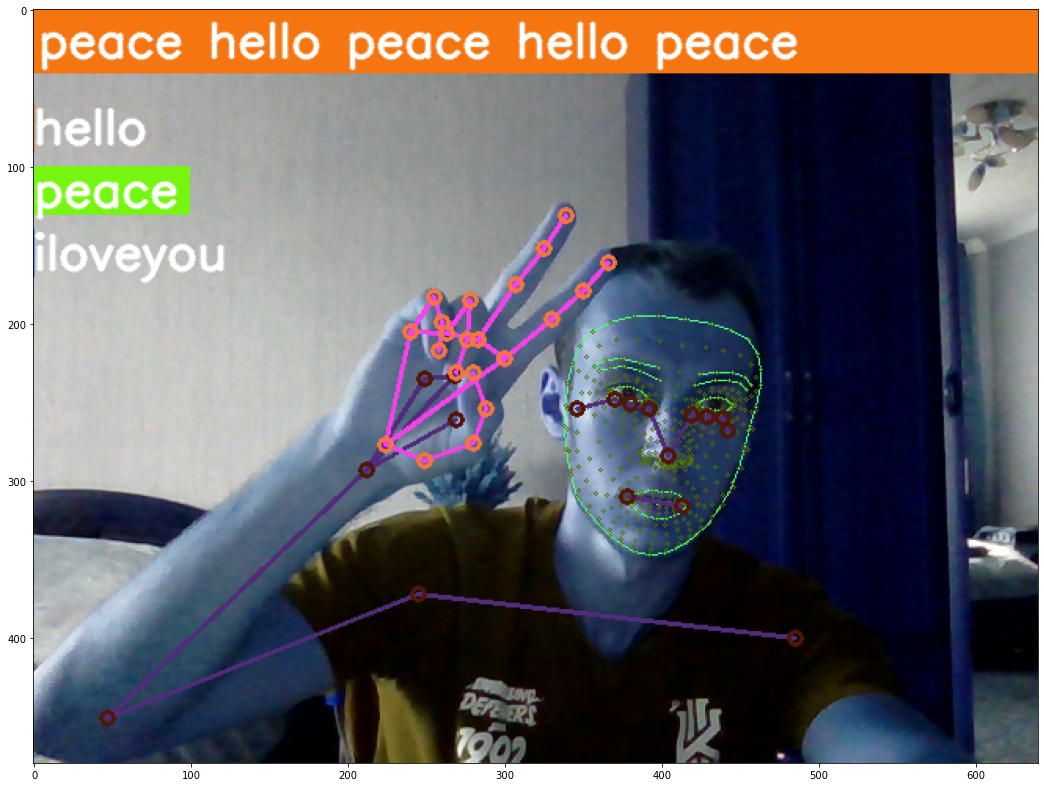

In [48]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))